In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### questions to attend

If i want to know that how safer a cycle is, i need to learn 
- how many accidents how happened that involves cycles
- Severity of the accidents that happen
- injury levels of the accidents 
- where the majority of the accidents happen
- during which day of the week
- to whom men / women  and what age band ?
- during what type of travel the collisions happen ?

In [2]:
casuality_df = pd.read_csv('../data/processed_casuality.csv', header=0)
collision_df = pd.read_csv(filepath_or_buffer='../data/processed_collision.csv', header=0)
vehicle_df = pd.read_csv(filepath_or_buffer='../data/processed_vehicle.csv', header=0)

C:\Users\akson\AppData\Local\Temp\ipykernel_4268\1869349738.py:1: DtypeWarning: Columns (0,2,18) have mixed types. Specify dtype option on import or set low_memory=False.
  casuality_df = pd.read_csv('../data/processed_casuality.csv', header=0)
C:\Users\akson\AppData\Local\Temp\ipykernel_4268\1869349738.py:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_df = pd.read_csv(filepath_or_buffer='../data/processed_collision.csv', header=0)
C:\Users\akson\AppData\Local\Temp\ipykernel_4268\1869349738.py:3: DtypeWarning: Columns (0,2,27) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv(filepath_or_buffer='../data/processed_vehicle.csv', header=0)


In [3]:
casuality_df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

In [4]:
collision_df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [5]:
vehicle_df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'lsoa_of_driver'],
      dtype='object')

In [6]:
cols = [
    "accident_index", "accident_year", "casualty_class", "sex_of_casualty", 
]
casuality_df = casuality_df[cols]


cols = [
    "accident_index", "accident_severity", "number_of_casualties", "day_of_week", "road_type", "weather_conditions", 
    "road_surface_conditions", "light_conditions", "urban_or_rural_area", 
]
collision_df = collision_df[cols]


cols = [
    "accident_index", "vehicle_type", "first_point_of_impact", "journey_purpose_of_driver",
    "sex_of_driver", "age_band_of_driver", "age_of_vehicle"
]
vehicle_df = vehicle_df[cols]



### how many accidents how happened that involves cycles

In [7]:
plot_df = vehicle_df['vehicle_type'].value_counts(normalize=True).reset_index()
plot_df["proportion"] = plot_df["proportion"].apply(lambda x: round(x * 100, 2))
vehicle_type_name = {
    1: 'PedalCycle',
    2: 'MotorCycle50cc',
    3: 'MotorCycle125cc',
    4: 'MotorCycle125_500cc',
    5: 'MotorCycle500cc+',
    8: 'Taxi',
    9: 'Car',
    10: 'Minibus',
    11: 'Bus/Coach',
    16: 'RiddenHorse',
    17: 'AgricultureVehicle',
    18:  'Tram',
    19: 'Van/Goods',
    20: 'Goods3.5_7.5ft',
    21: 'Goods7.5ft',
    22: 'MobilityScooter',
    23: 'ElectricMotorcycle',
    90: 'OtherVehicle'
}
def set_name(x):
    if x['proportion'] > 5:
        return x['vehicle_type_name']
    else:
        return 'Others'
        
plot_df["vehicle_type_name"] = plot_df["vehicle_type"].map(vehicle_type_name)
plot_df["vehicle_type_name"] = plot_df.apply(set_name, axis=1)
plot_df[plot_df["vehicle_type_name"] == "Others"]["proportion"].sum()

16.14

In [8]:
plot_df.head()

,vehicle_type,proportion,vehicle_type_name
0,9,69.16,Car
1,1,8.66,PedalCycle
2,19,6.04,Van/Goods
3,3,4.21,Others
4,5,2.42,Others


In [303]:
plot_df['proportion'].sum()

100.00000000000001

#### plotting

In [304]:
df = pd.DataFrame({
    "Vehicle": ["Car", "PedalCycle", "Van/Goods", "Others"],
    "Proportion": [69.16, 8.66, 6.04, 16.14]
})

df.head()

,Vehicle,Proportion
0,Car,69.16
1,PedalCycle,8.66
2,Van/Goods,6.04
3,Others,16.14


In [305]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [306]:
palt = sns.color_palette('pastel')[:]
custom_colors = [
    palt[0],
    palt[1],
    palt[2],
    palt[-1]
]

custom_colors = ["#C8E4B2", "#9ED2BE", "#7EAA92", "#FFD9B7"]
font_family= "Times New Roman"

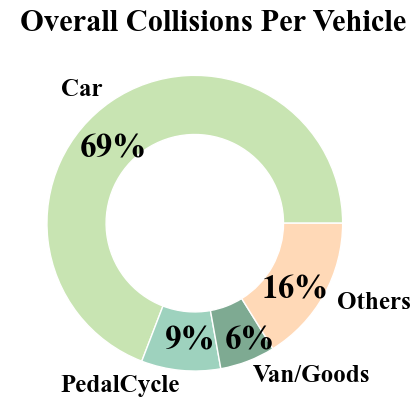

In [307]:
fig, ax = plt.subplots()
size = 0.3
font_size = 24
font_weight = "bold"
font_color = "black"


outer_pie0 = ax.pie(df["Proportion"], radius=1, colors=custom_colors, wedgeprops=dict(width=0.4, edgecolor='w'), labels=df["Vehicle"],
                   textprops={'fontsize': 18, "fontfamily": font_family, "fontweight": "bold", "color": font_color})

ax.annotate("69%", xy=(-0.78, 0.45), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight=font_weight)
ax.annotate("16%", xy=(0.45, -0.50), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight=font_weight)
ax.annotate("6%", xy=(0.2, -0.85), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight=font_weight)
ax.annotate("9%", xy=(-0.2, -0.85), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight=font_weight)

plt.title("Overall Collisions Per Vehicle", fontsize=22, fontfamily=font_family, x=0.55, y=1, fontweight="bold", color=font_color)
# plt.show()
plt.savefig('images/intro_pie_chart1.png', transparent=True)

### Severity of the accidents that happen

In [9]:
vehicle_df.head()

,accident_index,vehicle_type,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,age_of_vehicle
0,2018010080971,9,1,6,1,6,5
1,2018010080971,8,2,6,1,8,6
2,2018010080973,9,1,6,3,-1,-1
3,2018010080974,8,1,1,1,7,6
4,2018010080974,9,1,6,1,5,-1


In [10]:
cycle_df = vehicle_df[vehicle_df["vehicle_type"] == 1]

In [11]:
cycle_df.shape

(85764, 7)

In [13]:
sub_collision_df = collision_df[collision_df['accident_index'].isin(cycle_df['accident_index'].unique())]

In [14]:
sub_collision_df.shape

(68453, 9)

In [15]:
sub_collision_df.head()

,accident_index,accident_severity,number_of_casualties,day_of_week,road_type,weather_conditions,road_surface_conditions,light_conditions,urban_or_rural_area
6,2018010080986,2,1,2,6,1,1,4,1
16,2018010081003,2,1,2,6,1,1,1,1
44,2018010081159,3,1,3,6,1,2,4,1
46,2018010081171,3,1,3,1,2,2,4,1
49,2018010081184,3,1,3,6,2,2,4,1


In [16]:
cycle_df = cycle_df.merge(sub_collision_df, on="accident_index", how="left").reset_index(drop=1)
cycle_df.shape

(85764, 15)

In [17]:
cycle_df.head()

,accident_index,vehicle_type,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,age_of_vehicle,accident_severity,number_of_casualties,day_of_week,road_type,weather_conditions,road_surface_conditions,light_conditions,urban_or_rural_area
0,2018010080986,1,1,6,1,6,-1,2.0,1.0,2.0,6.0,1.0,1.0,4.0,1.0
1,2018010081003,1,2,6,1,7,-1,2.0,1.0,2.0,6.0,1.0,1.0,1.0,1.0
2,2018010081159,1,2,6,1,6,-1,3.0,1.0,3.0,6.0,1.0,2.0,4.0,1.0
3,2018010081171,1,9,2,2,6,-1,3.0,1.0,3.0,1.0,2.0,2.0,4.0,1.0
4,2018010081184,1,9,6,1,6,-1,3.0,1.0,3.0,6.0,2.0,2.0,4.0,1.0


In [18]:
severity_map = {1: "Fatal" , 2: "Serious", 3: "Slight"}

cycle_df["severity_name"] = cycle_df['accident_severity'].map(severity_map)

cycle_df['severity_name'].value_counts(normalize=True)

severity_name
Slight     0.763503
Serious    0.229639
Fatal      0.006857
Name: proportion, dtype: float64

In [274]:
df = pd.DataFrame({
    "Severity": ["Slight", "Serious", "Fatal"],
    "Proportion": [76, 23, 1]
})

df.head()

,Severity,Proportion
0,Slight,76
1,Serious,23
2,Fatal,1


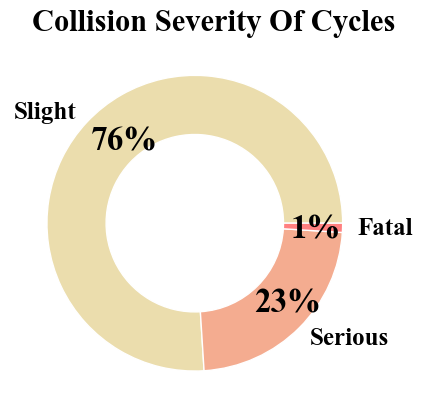

In [285]:
fig, ax = plt.subplots()
size = 0.3
font_size = 24
font_weight = "bold"
font_color = "black"

custom_colors = ["#F8E8EE", "#FDCEDF", "#eb6596"]
custom_colors = ["#FFFEC4", "#FFBFA2", "#FF8080"]
custom_colors = ["#ebddad", "#F4AC90", "#FF8080"]


outer_pie0 = ax.pie(df["Proportion"], radius=1, colors=custom_colors, wedgeprops=dict(width=0.4, edgecolor='w'), labels=df["Severity"],
                   textprops={'fontsize': 18, "fontfamily": font_family, "fontweight": "bold", "color": font_color})

ax.annotate("76%", xy=(-0.7, 0.5), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight=font_weight)
ax.annotate("23%", xy=(0.40, -0.60), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight=font_weight)
ax.annotate("1%", xy=(0.65, -0.1), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight=font_weight)

plt.title("Collision Severity Of Cycles", fontsize=22, fontfamily=font_family, x=0.55, y=1, fontweight="bold", color=font_color)
# plt.show()
plt.savefig('images/intro_pie_chart2.png', transparent=True)

### number of casuality of the accidents

In [249]:
cycle_df['year'] = cycle_df['accident_index'].apply(lambda x: int(str(x)[:4]))
cycle_df.head()

,accident_index,vehicle_type,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,age_of_vehicle,accident_severity,number_of_casualties,day_of_week,road_type,weather_conditions,road_surface_conditions,light_conditions,urban_or_rural_area,severity_name,year
0,2018010080986,1,1,6,1,6,-1,2.0,1.0,2.0,6.0,1.0,1.0,4.0,1.0,Serious,2018
1,2018010081003,1,2,6,1,7,-1,2.0,1.0,2.0,6.0,1.0,1.0,1.0,1.0,Serious,2018
2,2018010081159,1,2,6,1,6,-1,3.0,1.0,3.0,6.0,1.0,2.0,4.0,1.0,Slight,2018
3,2018010081171,1,9,2,2,6,-1,3.0,1.0,3.0,1.0,2.0,2.0,4.0,1.0,Slight,2018
4,2018010081184,1,9,6,1,6,-1,3.0,1.0,3.0,6.0,2.0,2.0,4.0,1.0,Slight,2018


In [250]:
plot_df = cycle_df.groupby('year').aggregate({'number_of_casualties': sum}).reset_index()

C:\Users\akson\AppData\Local\Temp\ipykernel_5708\2974501523.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  plot_df = cycle_df.groupby('year').aggregate({'number_of_casualties': sum}).reset_index()


In [251]:
plot_df.head()

,year,number_of_casualties
0,2018,18558.0
1,2019,15930.0
2,2020,13782.0
3,2021,12660.0
4,2022,11805.0


In [252]:
plot_df['number_of_casualties'] = plot_df['number_of_casualties'] / 1000
plot_df.head()

,year,number_of_casualties
0,2018,18.558
1,2019,15.930
2,2020,13.782
3,2021,12.660
4,2022,11.805


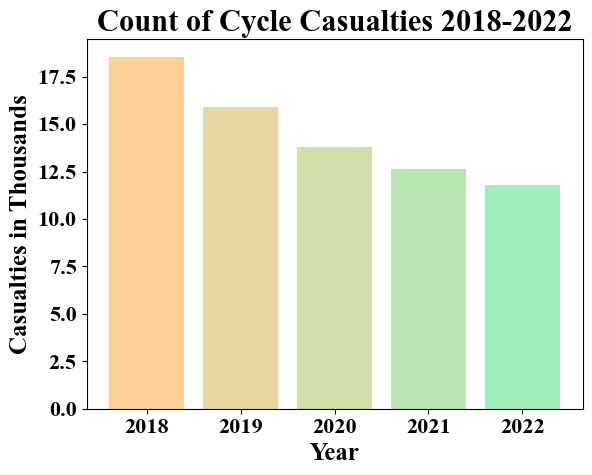

In [253]:
fig, ax = plt.subplots()
size = 0.3
font_size = 22
font_weight = "bold"
font_color = "black"


custom_colors = ["#FFCF96", "#E8D7A0", "#D0DFAA", "#B9E6B3", "#A1EEBD"]

plt.bar(plot_df['year'], plot_df['number_of_casualties'], color=custom_colors)
plt.xticks(color=font_color, fontsize=16, fontfamily=font_family, fontweight="bold")
plt.yticks(color=font_color, fontsize=16, fontfamily=font_family, fontweight="bold")
plt.title("Count of Cycle Casualties 2018-2022", fontsize=font_size, fontfamily=font_family, x=0.5, y=1, fontweight="bold", color=font_color)
plt.xlabel("Year", color=font_color, fontsize=18, fontfamily=font_family, fontweight="bold")
plt.ylabel("Casualties in Thousands", color=font_color, fontsize=18, fontfamily=font_family, fontweight="bold")
# plt.show()
plt.savefig('images/intro_bar_chart1.png', transparent=True)

### where the majority of the accidents happen

In [201]:
import matplotlib.patches as mpatches

In [155]:
inner_circle = cycle_df['urban_or_rural_area'].value_counts(normalize=True).reset_index()
inner_circle["proportion"] = round(inner_circle["proportion"] * 100, 2)
inner_circle

,urban_or_rural_area,proportion
0,1.0,82.28
1,2.0,17.69
2,3.0,0.03


In [186]:
prop_map = {1: 0.82, 2: 0.18}
for i in [1, 2]:
    print(i)
    outer_circle = cycle_df[cycle_df["urban_or_rural_area"] == i]["road_type"].value_counts(normalize=True).reset_index()
    outer_circle['proportion'] = round(outer_circle['proportion'] * 100 * prop_map[i], 2)
    print(outer_circle)
    print() 

1
   road_type  proportion
0        6.0       61.36
1        3.0        7.15
2        1.0        6.93
3        2.0        3.13
4        9.0        2.63
5        7.0        0.80

2
   road_type  proportion
0        6.0       14.32
1        1.0        2.28
2        3.0        0.98
3        9.0        0.20
4        7.0        0.13
5        2.0        0.09



In [188]:
sum([61, 7, 7, 3, 3, 1, 14, 2, 1, 1])

100

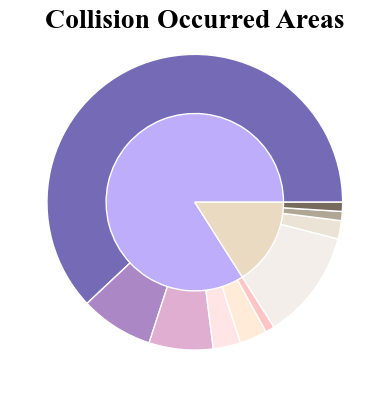

In [199]:
fig, ax = plt.subplots()
size = 0.3

font_color = "black"
colors = sns.color_palette('pastel')[:]
outer_pie1_colors = [colors[0], colors[2]]
outer_pie1_colors = ["#BEADFA", "#E9DAC1"]

outer_pie2_colors = [
    colors[3],
    colors[4],
    colors[5],
    colors[6],
    [89/255, 89/255, 89/255, 1]
]

# area distribution
outer_pie1 = ax.pie([84, 16], radius=1, colors=outer_pie1_colors, wedgeprops=dict(width=1, edgecolor='w'))
# ax.annotate("82%", xy=(-0.1, 0.35), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight="bold")
# ax.annotate("18%", xy=(0.25, -0.2), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight="bold")
urban = mpatches.Patch(color=outer_pie1_colors[0], label='Urban')
rural = mpatches.Patch(color=outer_pie1_colors[1], label='Rural')

# road distribution 
outer_pie_colors = ["#756AB6", "#AC87C5", "#E0AED0", "#FFE5E5", "#FFEBD8", "#FFC5C5", "#F3EEEA", "#EBE3D5", "#B0A695", "#776B5D"]
outer_pie2 = ax.pie([62, 8, 7, 3, 3, 1, 12, 2, 1, 1], radius=1, colors=outer_pie_colors, wedgeprops=dict(width=0.4, edgecolor='w'))
# ax.annotate("75", xy=(-0.1, 0.7), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight="bold")
# ax.annotate("9", xy=(-0.6, -0.7), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight="bold")
# ax.annotate("8", xy=(-0.25, -0.85), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight="bold")
# ax.annotate("8", xy=(0.1, -0.85), horizontalalignment="left", color=font_color, fontsize=font_size, fontfamily=font_family, fontweight="bold")
urban = mpatches.Patch(color=outer_pie1_colors[0], label='Urban')
rural = mpatches.Patch(color=outer_pie1_colors[1], label='Rural')


# legend_handles = [urban, rural]

plt.title("Collision Occurred Areas", fontsize=20, fontfamily=font_family, x=0.5, y=0.95, fontweight="bold", color=font_color)
# plt.legend(handles=legend_handles, bbox_to_anchor=(0, 0.75), labelcolor="white", facecolor=[89/255, 89/255, 89/255], prop={'family':"Agency FB", 'size':18, 'weight': 'bold'}, ncol=1)
plt.show()
plt.savefig('images/intro_bar_chart1.png', transparent=True)

In [262]:
import seaborn as sns
import numpy as np

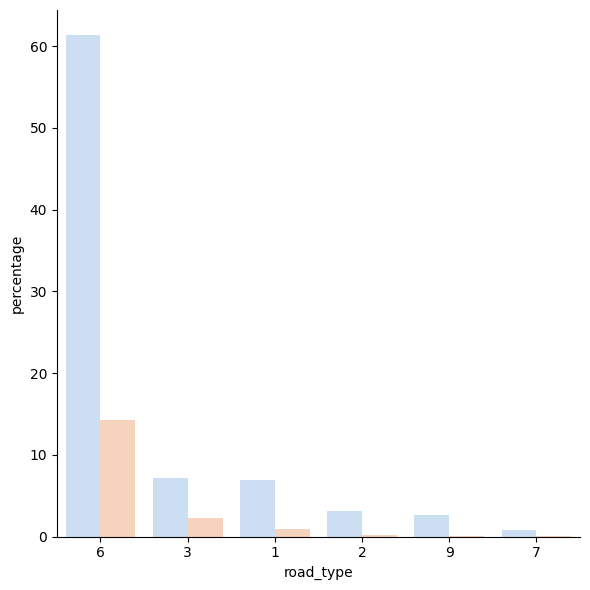

In [273]:
tmp_df = pd.DataFrame({
    "road_type": ["6", "3", "1", "2", "9", "7", "6", "3", "1", "2", "9", "7"],
    "area": ["Urban", "Urban", "Urban", "Urban", "Urban", "Urban", "Rural", "Rural", "Rural", "Rural", "Rural", "Rural"], 
    "percentage": [61.36, 7.15, 6.93, 3.13, 2.63, 0.80, 14.32, 2.28, 0.98, 0.20, 0.13, 0.09]
})

sns.catplot(
    data=tmp_df, kind="bar",
    x="road_type", y="percentage", hue="area",
    errorbar="sd", palette="pastel", alpha=0.6, height=6, legend=False
)
# g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("Collisions at Road Type")
plt.title("Collisions at Road Type")
plt.show()

### to whom men / women and what age band ?

In [286]:
cycle_df.head()

,accident_index,vehicle_type,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,age_of_vehicle,accident_severity,number_of_casualties,day_of_week,road_type,weather_conditions,road_surface_conditions,light_conditions,urban_or_rural_area,severity_name,year
0,2018010080986,1,1,6,1,6,-1,2.0,1.0,2.0,6.0,1.0,1.0,4.0,1.0,Serious,2018
1,2018010081003,1,2,6,1,7,-1,2.0,1.0,2.0,6.0,1.0,1.0,1.0,1.0,Serious,2018
2,2018010081159,1,2,6,1,6,-1,3.0,1.0,3.0,6.0,1.0,2.0,4.0,1.0,Slight,2018
3,2018010081171,1,9,2,2,6,-1,3.0,1.0,3.0,1.0,2.0,2.0,4.0,1.0,Slight,2018
4,2018010081184,1,9,6,1,6,-1,3.0,1.0,3.0,6.0,2.0,2.0,4.0,1.0,Slight,2018


In [295]:
for i in [1, 2]:
    tmp_df = cycle_df[cycle_df['sex_of_driver'] == i]
    print('gender', i)
    print(tmp_df['accident_severity'].value_counts(normalize=True))

gender 1
accident_severity
3.0    0.758434
2.0    0.234140
1.0    0.007426
Name: proportion, dtype: float64
gender 2
accident_severity
3.0    0.780281
2.0    0.214804
1.0    0.004915
Name: proportion, dtype: float64


In [297]:
for i in [1, 2]:
    for j in [1, 2, 3]:
        tmp_df = cycle_df[(cycle_df['sex_of_driver'] == i) & (cycle_df['accident_severity'] == j)]
        print('gender', i, 'severity', j)
        print(tmp_df['age_band_of_driver'].value_counts(normalize=True).head())

gender 1 severity 1
age_band_of_driver
9     0.187348
8     0.180049
10    0.153285
7     0.121655
11    0.107056
Name: proportion, dtype: float64
gender 1 severity 2
age_band_of_driver
8    0.193780
6    0.179503
7    0.177111
9    0.118923
3    0.080182
Name: proportion, dtype: float64
gender 1 severity 3
age_band_of_driver
6    0.221208
7    0.171082
8    0.151618
3    0.099419
5    0.095583
Name: proportion, dtype: float64
gender 2 severity 1
age_band_of_driver
8     0.215385
6     0.184615
9     0.169231
7     0.153846
10    0.092308
Name: proportion, dtype: float64
gender 2 severity 2
age_band_of_driver
6    0.223513
8    0.201338
7    0.180218
9    0.131996
5    0.091165
Name: proportion, dtype: float64
gender 2 severity 3
age_band_of_driver
6    0.289438
7    0.181395
8    0.151550
5    0.112306
9    0.087791
Name: proportion, dtype: float64


In [298]:
cycle_df['road_type'].value_counts(normalize=True)

road_type
6.0    0.756588
1.0    0.091959
3.0    0.081443
2.0    0.032308
9.0    0.028405
7.0    0.009296
Name: proportion, dtype: float64

In [299]:
cycle_df['sex_of_driver'].value_counts(normalize=True)

sex_of_driver
1    0.791486
2    0.191852
3    0.016662
Name: proportion, dtype: float64

### Map data

In [308]:
casuality_df = pd.read_csv('../data/processed_casuality.csv', header=0)
collision_df = pd.read_csv(filepath_or_buffer='../data/processed_collision.csv', header=0)
vehicle_df = pd.read_csv(filepath_or_buffer='../data/processed_vehicle.csv', header=0)

C:\Users\akson\AppData\Local\Temp\ipykernel_5708\1869349738.py:1: DtypeWarning: Columns (0,2,18) have mixed types. Specify dtype option on import or set low_memory=False.
  casuality_df = pd.read_csv('../data/processed_casuality.csv', header=0)
C:\Users\akson\AppData\Local\Temp\ipykernel_5708\1869349738.py:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_df = pd.read_csv(filepath_or_buffer='../data/processed_collision.csv', header=0)
C:\Users\akson\AppData\Local\Temp\ipykernel_5708\1869349738.py:3: DtypeWarning: Columns (0,2,27) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv(filepath_or_buffer='../data/processed_vehicle.csv', header=0)


In [325]:
vehicle_cols = ["vehicle_type", "accident_index"]
collision_cols = ["accident_index"] + ['latitude', 'longitude', 'local_authority_district']

tmp1 = vehicle_df[vehicle_df['vehicle_type'] == 1][vehicle_cols]
tmp2 = collision_df[collision_df['accident_index'].isin(tmp1['accident_index'])][collision_cols]

plot_df = tmp1.merge(tmp2, on='accident_index', how="left")
plot_df.shape

(85764, 5)

In [326]:
plot_df.head()

,vehicle_type,accident_index,latitude,longitude,local_authority_district
0,1,2018010080986,51.514545,-0.199239,12.0
1,1,2018010081003,51.518147,-0.265255,27.0
2,1,2018010081159,51.602341,-0.065515,31.0
3,1,2018010081171,51.548360,-0.080353,3.0
4,1,2018010081184,51.462934,-0.113885,9.0


In [327]:
local_auth_code_df = pd.read_csv('local_authority_code.csv', header=0)
local_auth_code_df.head()

,code,name
0,1,Westminster
1,2,Camden
2,3,Islington
3,4,Hackney
4,5,Tower Hamlets


In [328]:
local_auth_code_map = {i: j for i, j in zip(local_auth_code_df['code'], local_auth_code_df['name'])}

In [329]:
plot_df["district_name"] = plot_df["local_authority_district"].map(local_auth_code_map)

In [330]:
plot_df.head()

,vehicle_type,accident_index,latitude,longitude,local_authority_district,district_name
0,1,2018010080986,51.514545,-0.199239,12.0,Kensington and Chelsea
1,1,2018010081003,51.518147,-0.265255,27.0,Ealing
2,1,2018010081159,51.602341,-0.065515,31.0,Haringey
3,1,2018010081171,51.548360,-0.080353,3.0,Islington
4,1,2018010081184,51.462934,-0.113885,9.0,Lambeth


In [331]:
map_data = plot_df["district_name"].value_counts(normalize=True, ascending=False).reset_index()
map_data.head()

,district_name,proportion
0,Code depricated,0.337106
1,Westminster,0.014418
2,Southwark,0.013457
3,Lambeth,0.012668
4,"Bristol, City of",0.011362


In [332]:
map_data = map_data.drop(index=0)
map_data = map_data.reset_index(drop=1)
map_data.head()

,district_name,proportion
0,Westminster,0.014418
1,Southwark,0.013457
2,Lambeth,0.012668
3,"Bristol, City of",0.011362
4,Tower Hamlets,0.011118


In [333]:
map_data['proportion'] = round(map_data['proportion'] * 100, 4)

In [334]:
map_df = plot_df.copy()

In [339]:
from shapely.geometry import MultiPoint

In [342]:
map_df.shape

(85764, 6)

In [344]:
final_map_data = {
    'lat': [],
    'long': [],
    'name': [],
    'count': []
}

for idx, row in map_data.iterrows():
    sub_df = map_df[map_df['district_name'] == row['district_name']]
    count = sub_df.shape[0]
    if count > 0:
        try:
            point = MultiPoint([(lon, lat) for lon, lat in zip(sub_df['longitude'], sub_df['latitude'])]).centroid
        except:
            continue
        else:
            final_map_data['count'].append(count)
            final_map_data['lat'].append(point.y)
            final_map_data['long'].append(point.x)
            final_map_data['name'].append(row['district_name'])

final_map_data = pd.DataFrame(final_map_data)
final_map_data.head()

,lat,long,name,count
0,51.511726,-0.152139,Westminster,1005
1,51.484269,-0.081332,Southwark,938
2,51.465842,-0.120359,Lambeth,883
3,51.453128,-0.181700,Wandsworth,768
4,53.812191,-1.556556,Leeds,763


In [347]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

%matplotlib inline

In [348]:
geometry = [Point(xy) for xy in zip(final_map_data['long'], final_map_data['lat'])]

In [349]:
crs = {'init':'epsg:27700'}

In [350]:
geo_df = gpd.GeoDataFrame(final_map_data, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

D:\studies\HDSAssignments\PMIM502\venv\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,lat,long,name,count,geometry
0,51.511726,-0.152139,Westminster,1005,POINT (-0.152 51.512)
1,51.484269,-0.081332,Southwark,938,POINT (-0.081 51.484)
2,51.465842,-0.120359,Lambeth,883,POINT (-0.120 51.466)
3,51.453128,-0.181700,Wandsworth,768,POINT (-0.182 51.453)
4,53.812191,-1.556556,Leeds,763,POINT (-1.557 53.812)


<Axes: >

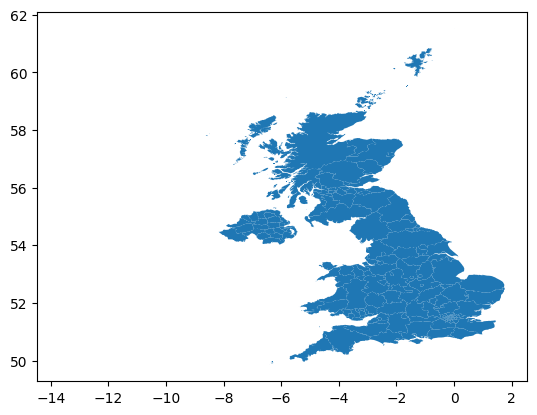

In [351]:
street_map = gpd.read_file('GBR_adm2.shp')
street_map.plot()

In [352]:
from matplotlib.lines import Line2D
from matplotlib_scalebar.scalebar import ScaleBar

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


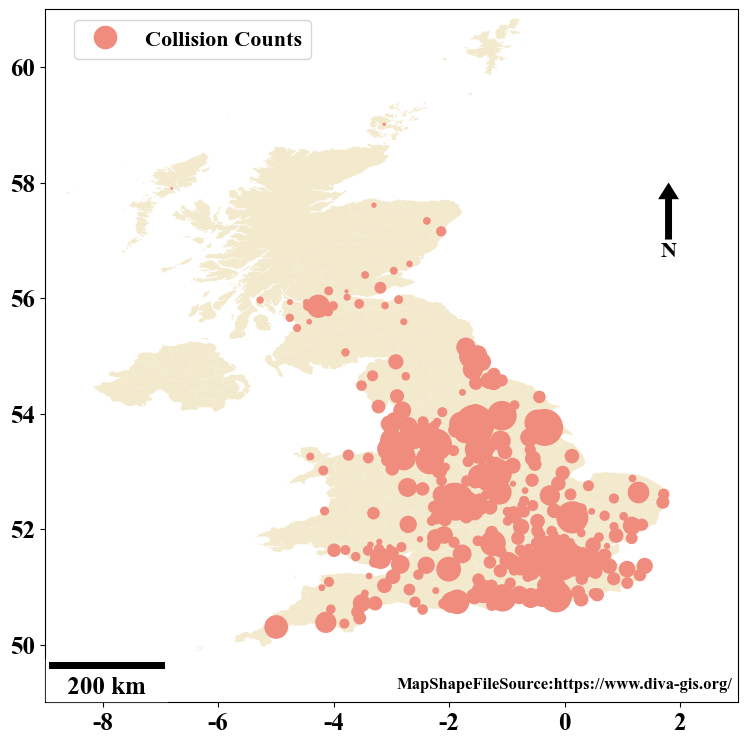

In [353]:
font_color = "black"
font_family = "Times New Roman"
points_color = '#f08c7d' # "#9ED2BE" # "#FFD9B7"
map_color = "#F3EACE" # "#F5F5F5"


fig, ax = plt.subplots(figsize=(9, 9))
street_map.plot(ax=ax, alpha=1, color=map_color) # 
geo_df.plot(ax=ax, 
            markersize='count', 
            color=points_color, # "#9ED2BE", #'#f08c7d', 
            marker='o', 
            legend=False)
plt.legend(prop={'size':15})
plt.xticks([-8, -6, -4, -2, 0, 2], [-8, -6, -4, -2, 0, 2], color=font_color, fontsize=18, fontfamily=font_family, fontweight="bold")
plt.yticks([50, 52, 54, 56, 58, 60], [50, 52, 54, 56, 58, 60], color=font_color, fontsize=18, fontfamily=font_family, fontweight="bold")
# plt.xlabel("Latitude",  color=font_color, fontsize=18, fontfamily=font_family, fontweight="bold")
# plt.ylabel("Longitude",  color=font_color, fontsize=18, fontfamily=font_family, fontweight="bold")
# plt.title("Collision Occurred Areas in UK Districts", fontsize=22, fontfamily=font_family, fontweight="bold", color=font_color)
red_circle = Line2D([0], [0], marker='o', color=points_color, label='Collision Counts', markerfacecolor=points_color, markersize=16 , linewidth=0) # '#f08c7d'
# red_circle = patches.Circle()
leg_handles = [red_circle]
plt.legend(handles=leg_handles, bbox_to_anchor=(0.4, 1), labelcolor=font_color, 
           prop={'family':font_family, 'size':16, 'weight': 'bold'},
           facecolor=[1, 1, 1]  # [89/255, 89/255, 89/255]
        )

x, y, arrow_length = 0.9, 0.75, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor=font_color, width=5, headwidth=15, linewidth=0),
            ha="center", va="center", color=font_color, fontsize=16, fontfamily=font_family, fontweight="bold",
            xycoords=ax.transAxes)
ax.annotate('MapShapeFileSource:https://www.diva-gis.org/', xy=(0.75, 0.025),
            ha="center", va="center", color=font_color, fontsize=12, fontfamily=font_family, fontweight="bold",
            xycoords=ax.transAxes)
ax.add_artist(ScaleBar(
    dx=1,
    units="km",
     dimension="si-length",
     length_fraction=0.25,
    scale_formatter=lambda value, unit: f' {value * 100} km ',
    location='lower left',
    font_properties={'family':font_family, 'size':18, 'weight': 'bold'},
    color=font_color,
    box_color=[1, 1, 1]  #[89/255, 89/255, 89/255]
    
))
plt.xlim(-9, 3)
plt.ylim(49, 61)
# plt.grid()
# plt.show()
plt.savefig('images/map.png', transparent=True, pad_inches = 0, orientation="landscape")